Lets filter some data from home-assistant, in this case the outside temperatures recorded by dark-sky 

https://pythonprogramming.net/rolling-statistics-data-analysis-python-pandas-tutorial/

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html

In [1]:
ls

Filtering home-assistant data.ipynb  darksky_temperature.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal
%matplotlib inline

In [3]:
df = pd.read_csv('darksky_temperature.csv', index_col=0) 
df.index = pd.to_datetime(df.index)  # Conver index to timestamp
df.columns = ['raw']
df.head()

,raw
2018-02-03 20:54:21.303548,
2018-02-03 20:54:21.307471,3.4
2018-02-03 20:54:21.313233,3.4
2018-02-03 20:54:21.316310,3.4
2018-02-03 20:54:21.374422,3.4
2018-02-03 20:54:21.405760,3.4


In [4]:
df['savgol'] = scipy.signal.savgol_filter(x=df['raw'].values, window_length=201, polyorder=2)

/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Lets look at a noisy few days

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,center=False).mean()
  import sys


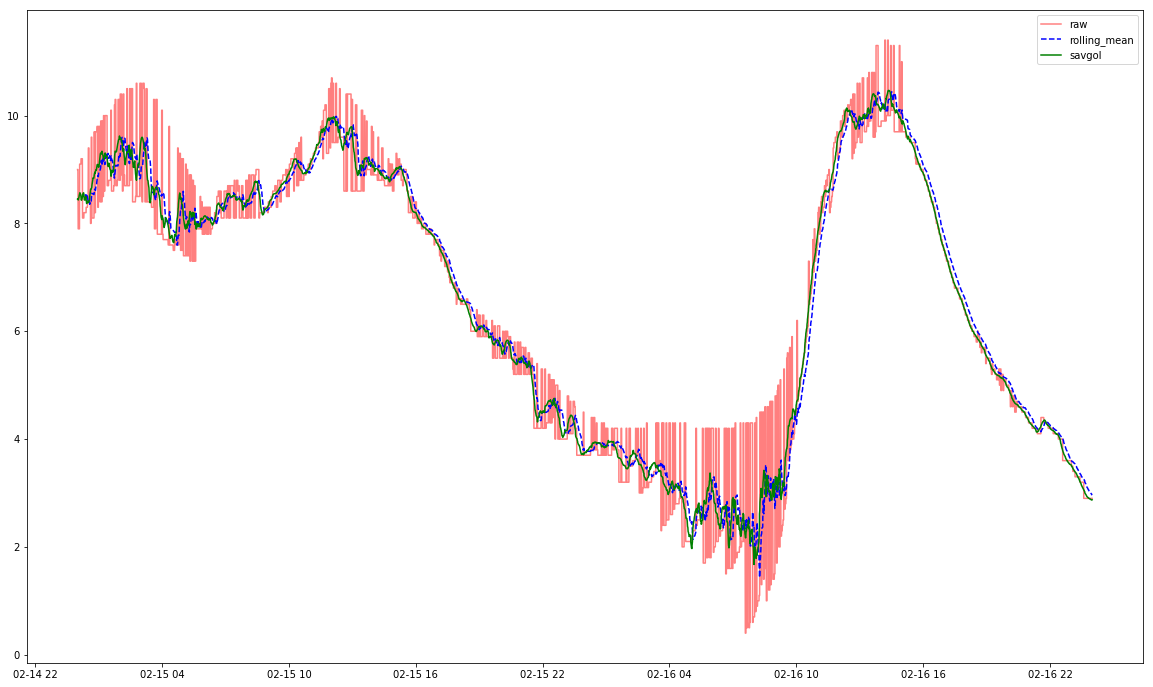

In [5]:
start = '2018-2-15'
end = '2018-2-16'
opacity = 0.5
plt.figure(figsize=(20,12))

plt.plot(df['raw'].loc[start:end], 'r', alpha=opacity, label='raw');
plt.plot(pd.rolling_mean(df['raw'].loc[start:end], 100), 'b--', label='rolling_mean');
plt.plot(df['savgol'].loc[start:end], 'g', label='savgol');
plt.legend();